## Sagemath

Sage is a free and open-source mathematics package
Based on the mainstream programming language Python
Headed by the mathematician William Stein, who is at the University of Washington, in Seattle

It similar, but not identical to python.

In [1]:
# ** means exponent
2**3 

8

In [2]:
# ^ is a synonym for ** (unlike in Python) 
2^3

8

In [3]:
# for integer arguments, % means mod, i.e., remainder
10 % 3 

1

In [4]:
# mathematics is exact
10/4

5/2

In [5]:
# another example
sqrt(8)

2*sqrt(2)

In [6]:
# let's define an algebraic ring
Zseven = Zmod(7)

In [7]:
# what are the elements?
Zseven.list()

[0, 1, 2, 3, 4, 5, 6]

In [8]:
# mathematical operations
x = Zseven(5)

print x + x 
print x * x

3
4


## The shift cipher

In [9]:
# Let's define a cipher using the letters of the alphabet
CS = ShiftCryptosystem(  AlphabeticStrings() )

# the plaintext message
m = CS.encoding("Go Navy! Beat Army!") 
print m

GONAVYBEATARMY


In [10]:
# encrypt with k = 1
c = CS.enciphering(1, m) # the ciphertext with k=1
print c

HPOBWZCFBUBSNZ


In [11]:
# now decrypt
print CS.deciphering(1, c)

GONAVYBEATARMY


In [12]:
# Now a bit more complicated
# Let's find the decryption of a ciphertext
c = CS.encoding("LRZZOACZZQTDZYPESLEXLVPDFDHTDPC")

# We try all the keys
for i in range(26):
		print i, CS.deciphering(i, c)

0 LRZZOACZZQTDZYPESLEXLVPDFDHTDPC
1 KQYYNZBYYPSCYXODRKDWKUOCECGSCOB
2 JPXXMYAXXORBXWNCQJCVJTNBDBFRBNA
3 IOWWLXZWWNQAWVMBPIBUISMACAEQAMZ
4 HNVVKWYVVMPZVULAOHATHRLZBZDPZLY
5 GMUUJVXUULOYUTKZNGZSGQKYAYCOYKX
6 FLTTIUWTTKNXTSJYMFYRFPJXZXBNXJW
7 EKSSHTVSSJMWSRIXLEXQEOIWYWAMWIV
8 DJRRGSURRILVRQHWKDWPDNHVXVZLVHU
9 CIQQFRTQQHKUQPGVJCVOCMGUWUYKUGT
10 BHPPEQSPPGJTPOFUIBUNBLFTVTXJTFS
11 AGOODPROOFISONETHATMAKESUSWISER
12 ZFNNCOQNNEHRNMDSGZSLZJDRTRVHRDQ
13 YEMMBNPMMDGQMLCRFYRKYICQSQUGQCP
14 XDLLAMOLLCFPLKBQEXQJXHBPRPTFPBO
15 WCKKZLNKKBEOKJAPDWPIWGAOQOSEOAN
16 VBJJYKMJJADNJIZOCVOHVFZNPNRDNZM
17 UAIIXJLIIZCMIHYNBUNGUEYMOMQCMYL
18 TZHHWIKHHYBLHGXMATMFTDXLNLPBLXK
19 SYGGVHJGGXAKGFWLZSLESCWKMKOAKWJ
20 RXFFUGIFFWZJFEVKYRKDRBVJLJNZJVI
21 QWEETFHEEVYIEDUJXQJCQAUIKIMYIUH
22 PVDDSEGDDUXHDCTIWPIBPZTHJHLXHTG
23 OUCCRDFCCTWGCBSHVOHAOYSGIGKWGSF
24 NTBBQCEBBSVFBARGUNGZNXRFHFJVFRE
25 MSAAPBDAARUEAZQFTMFYMWQEGEIUEQD


In [13]:
# k = 11 makes sense
CS.deciphering(11,c)

AGOODPROOFISONETHATMAKESUSWISER

In [14]:
# Can we make it more automatic?
# Let's use a longer text
raven =  """Once upon a midnight dreary, while I pondered, weak and weary, 
            Over many a quaint and curious volume of forgotten lore, 
            While I nodded, nearly napping, suddenly there came a tapping,
            As of some one gently rapping, rapping at my chamber door.
            Tis some visiter, I muttered, tapping at my chamber door --
            Only this,and nothing more."""
m = CS.encoding(raven)
frequency = m.frequency_distribution().function()
frequency

{A: 0.0891472868217055,
 B: 0.00775193798449612,
 C: 0.0193798449612403,
 D: 0.0581395348837209,
 E: 0.108527131782946,
 F: 0.0116279069767442,
 G: 0.0348837209302326,
 H: 0.0310077519379845,
 I: 0.0736434108527132,
 K: 0.00387596899224806,
 L: 0.0310077519379845,
 M: 0.0465116279069767,
 N: 0.0930232558139535,
 O: 0.0852713178294574,
 P: 0.0465116279069767,
 Q: 0.00387596899224806,
 R: 0.0736434108527132,
 S: 0.0310077519379845,
 T: 0.0620155038759690,
 U: 0.0271317829457364,
 V: 0.0116279069767442,
 W: 0.0155038759689922,
 Y: 0.0348837209302326}

In [15]:
# We define a function to plot the frequencies
import matplotlib.pyplot as plt
def plot_frequencies(frequency):
    sorted_frequencies = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

    letters = [ x[0] for x in sorted_frequencies]
    values = [ x[1] for x in sorted_frequencies]

    plt.bar(range(len(values)),values)
    plt.xticks(range(len(letters)), letters)
    plt.show()

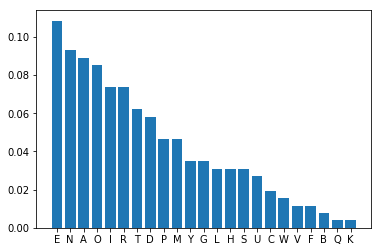

In [16]:
# Show the frequencies
plot_frequencies(frequency)

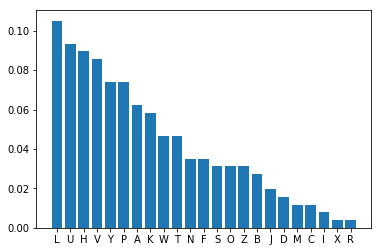

In [17]:
# Let's decrypt a longer message using frequenccy analysis
ciphertext = """VUJLBWVUHTPKUPNOAKYLHYFDOPSLPWVUK
                LYLKDLHRHUKDLHYFVCLYTHUFHXBHPUAHU
                KJBYPVBZCVSBTLVMMVYNVAALUSVYLDOPS
                LPUVKKLKULHYSFUHWWPUNZBKKLUSFAOLY
                LJHTLHAHWWPUNHZVMZVTLVULNLUASFYHW
                WPUNYHWWPUNHATFJOHTILYKVVYAPZZVTL
                CPZPALYPTBAALYLKAHWWPUNHATFJOHTIL
                YKVVYVUSFAOPZHUKUVAOPUNTVY"""
AS = AlphabeticStrings()
A = AS.alphabet()
CS = ShiftCryptosystem(AS)
c = CS.encoding(ciphertext)
fd = c.frequency_distribution().function()
plot_frequencies(fd)

In [18]:
# Maybe E is encrypted to L?
# We calculate the shift
shift = A.index("L")-A.index("E")
shift

7

In [19]:
CS.deciphering(shift, c)

ONCEUPONAMIDNIGHTDREARYWHILEIPONDEREDWEAKANDWEARYOVERMANYAQUAINTANDCURIOUSVOLUMEOFFORGOTTENLOREWHILEINODDEDNEARLYNAPPINGSUDDENLYTHERECAMEATAPPINGASOFSOMEONEGENTLYRAPPINGRAPPINGATMYCHAMBERDOORTISSOMEVISITERIMUTTEREDTAPPINGATMYCHAMBERDOORONLYTHISANDNOTHINGMOR

In [20]:
# compare to m
m

ONCEUPONAMIDNIGHTDREARYWHILEIPONDEREDWEAKANDWEARYOVERMANYAQUAINTANDCURIOUSVOLUMEOFFORGOTTENLOREWHILEINODDEDNEARLYNAPPINGSUDDENLYTHERECAMEATAPPINGASOFSOMEONEGENTLYRAPPINGRAPPINGATMYCHAMBERDOORTISSOMEVISITERIMUTTEREDTAPPINGATMYCHAMBERDOORONLYTHISANDNOTHINGMORE

## Affine Cipher

In the affine cipher the letters of an alphabet of size n are first mapped to the integers in the range $0,\dots,n-1$.The encryption function for a single letter is:

$c = Enc(m) = am+b \mod n$

where $n$ is the modulo and $b$ is the magnitude of the shift. The key $k$ is the pair $(a,b)$. The value of $a$ must be chosen in such a way that $a$ and $n$ are coprime.
The decryption function is:

$m = Dec(c) = a^{-1}(c-b) \mod n$

where $a^{-1}$ is the multiplicative inverse of a modulo n.
Of course, with $a=1$, the affine cipher is the same as the shift cipher. However, the key space is larger, making this cipher slightly more secure than the shift cipher.

In [21]:
ACS = AffineCryptosystem(AlphabeticStrings())
m = ACS.encoding("Go Navy! Beat Army!")
print m

GONAVYBEATARMY


In [22]:
c = ACS.enciphering(17, 3, m)
print c

BHQDWVUTDODGZV


In [23]:
print ACS.deciphering(17, 3, c)

GONAVYBEATARMY


## Vigenère Cipher
The Vigenère cipher is a method of encrypting alphabetic text by using a series of different Caesar ciphers based on the letters of a keyword.
Let $M=M_0, M_1, \dots, M_n$ be the plaintext, $C=C_0, C_1, \dots, C_n$ be the ciphertext and $K=K_0, K_1, \dots, K_m$ be the encryption key (which is repeated until it matches the length of the plaintext).

Encryption works as follows:
$c_i = Enc(m_i) = m_i + k_i \mod 26$

Decryption can be performed as:
$m_i = Dec(c_i) = m_i - k_i \mod 26$

In [24]:
# We use a Vigenère cipher with a key of 14 letters
AS = AlphabeticStrings()
VC = VigenereCryptosystem(AS,14)

K = AS('ABCDEFGHIJKLMN')
m = VC.encoding("THECATINTHEHAT")
print m

THECATINTHEHAT


In [25]:
c = VC.enciphering(K,m)
print c

TIGFEYOUBQOSMG


In [26]:
VC.deciphering(K,c)

THECATINTHEHAT

A Vigenère cipher can be attacked with frequency analysis if we know the size of the key.

If the key-length is $t$, then the ciphertext characters $c_1$, $c_{1+t}$, $c_{1+2t}$, $\dots$ are encrypted using the same shift. Therefore, the frequencies of such characters are expected to be identical to the frequencies of standard English text.

To find the key size we use the Index of Coincidence Method.

We sample the ciphertext with period $t$ and calculate the frequencies.

If the key length is $t$, then the sampled text has the same frequencies as the plaintext language, otherwise the letters will occurr with roughly equal probability.

In [27]:
ct = AS.encoding("""
YOVTZFJBUOYIPWRLHISZQHEHCJMFJHMLDGGYDZDRDLKECXAYGAJSPFOWYRLWALNZWHOZSAFIFMH
YVGWBNUVAHMLIWLULTLBTYJGZNJZLPJSZWTRHUABILVVKTBCVWGLKGSCWVUHNAZFOHHJWKMLIWA
DCVJMXLEKSXYVBSHAKZSNYFOBJCZVSSJVQSYTRVORPEGHFUUNSWFJMFJSPVCNUFLRWLREPZAKGA
TYIGKNKZWOSKKGRFFZOCZSUMBGBILVJUDQGTBCEMNTDWRNHKWDZYGGGJPJLCUSRUSGLWGFJAYWK
TYCVDQHZFZDZLUQNUTLZDHEVKNAYGIYJFEAJUKSGJYZWGTMDWFJOFMGJOFDRJCVFHXPELVJPIUC
SZVIIJUTWGYOVKSJCVFHXORNSYLIJWKPVVVFCVLCWALJSIORNSILJLFTFVVAJFVLWBPCDBTARLH
JTGLHTLOHCZUULVJTKGAJAYWMMHMWDWLJWBYLUDWYACWPZAYGFWVILCRHEQHMLPOWQSJWSRSVKG
YLIJWGSVLVFUSSFTXLWGMLIWOKAVJDJYYSDXZFESNUKWZQLTLAFFSWTTBEVKMPTZKNSCJSIBTWA
DWYSBYHJEHTAYWQTTDGBUSRUSXVDWWSAVDZJJKECWLTSZRTFJSQVXAQFSRFRKHIDSXZVPQNARTZ
JAYSBRFFOBBOZUVBPCDDJYTWWALZFHMLTAFHBDKHFUTWGNKVLONSNAHMHNWBTAYABLTFJSYORFO
SVIVWSHIQGZJTWGXPFFCKCVJMSHKMFFSTSIXLJSBILWXSHAJXFTTDQWSMRFQDPNSGSVKWRKVILV
JKFUWQPKQOSKYMAFUZLMTMDQRNZGGGNAZGBRFKWBILIFSXZFXVJHILKFZVNSSZFUCSZGAQZVLKO
XAFEOPLDWHMLAWGYVWEMHVDHOSPFFGNDRKSXWVUWFSCQTTUUGTFUZEOQZRFRBHJABIBCYSIIPEM
UHIWBYZNAHMHXJSFAMSFNLKQCKWVLGBPKZHMLJWWXWVFHRVJLCKTPLWRLRFRSLMWFBHJKCMHGHM
FZNZSSMVWRNUXSBIJRJSXZZFUYOVEHMPJHSHBCAOWVWUVFYRUHJYXJSBDZLVRFXJCBAYSBIPEEM
RHEZCTKZVSWPMWRKYFEWYVEWCKTPHFNUTADFSJGIWJVKCKWCWOXBIWHTAYGGJDYGVFCVUVJYZKV
JKRFOKMVUHNVEXCWHWSWYOWMZFUUKOLHTACZZUGUNUVWRMHIVZDIVSHYOVLFTBSDSTMVPDQHZFW
SNKZSSHKMFJVILVJPELSSZZLMTMKZSLYRLWKPTSHNVELVZZUWFNCRTZJAYWFJPJKCRLKZWSNZFH
MLLFGJSWAGMHEVGJSWKOHYZXWHPEYZTCVGTFIIMHJDYAQMNFWGIPIWQYSPLCYOVZSFYKGTMPDOV
TORKVFKWJSVBVFHTJTSGNVELCYLJLHMLGSZYYPXFNLEVGMPGSBINFKGFTVJTNKVDWYFFXAJYVEO
SPDSFWPVVSFYCQOSKNSGMHGHMYVWABIPEEMBPWWOIPJHCXPKACSUFLISJFFUJUZSZBPKZADVNFC
GZVJJNUXEMUHILWFSZLMKVIVCRLJLWHWVLGXOVDCXAEGCUWFJHZUZLMTMGJCHBIABLAYGGJVWLV
JTFKHFNIWSFICWYNUUOSMHUTWWKJYCQKWAGMHWABJKFYFFISAHXHJEOQSDGBPLPSBIHTSHYOZKZ
FAKWFBHJSFJTRJYFICQZFYXWOSKSWOZAZXIQHEAAFSVFHNYVDMGSRUYFUUKOLHTACZZKGOSHJLC
SPJZWSNUWUWLVABXWVSYNUXGTMPJABYLCDWLLEUSRFNATJDYGOYOVSFYDRKBTARDWYACWHNUTLI
WLUOWYOJMDJYJLWYPFFAFKVXFJXLWBYHCDIXPFFHTAYWOSJZWBYWFHIQHIFCYPFFKMPTZFJNRJR
JKRDZGSRUYHHKKOXDZLQMLJABIPJYINZVFCYAYSHXOVOOXLMWFXLIACZZLHCSAYAGUVZFHFUUAA
JUKACSAYWAFAKWFFARDZKVIFCGLKLSWYVSGTUKZOSAYSHNAYSDULEKXZZKFCBAFTSWLDWAGLIWR
USLLCYOZKKFZKZSHHKKBFTVOOXTPXOAVIAHJWVLOSKGDODTRLSNHCGBJMVVVNTRFRMLRLHJUUWR
RLNZSWLMWFNDVFHFIFMHYOVZCZZVAHBHJWJJUNAHMKZXTNJLDHDAYSHNJFMZIWIWJJUKZWRMIGA
KVCDCBPEYAJAYJCZNYLVJZKJSJAJGIWMIASSKJZWUSRKHJKZFHMPJEOSUVJTTYJWJJYRDMJHIKR
ZYZFUBOZUVRFXWBJYRDHJTGWFFTVFHFUUUVFYRUHJYKZFTBXZHMLZFGYYLESSARDWYFFXHMLWAS
SKZFHJTGWFFUTWVFKZTZZZYLCHVEXSXZZLSCWVJWJUTWRFYRVWHHCSZYLISHNVEXCWAYWKTYJWW
LYVORFFSQRFFDGFJTFGRDTFJSNYIAHFICWATYVJSLHIVZJZJGTYOVXSJSZFUXVWGHMLIKWXBWXS
WLUEMXLCXHTBJWWSAVEDJYRLSQHEYIFNVLCRFRLZJUXLVNLMWBTMWWFJKYWFULIKCSHCNWTSVFQ
JTPHSYZFXQTBIKSBLIWAFKVLCKLVDHMLTZOSNVABRFUAGUVJAHNVEABTAFFZDUVYZJJKWRGBKAZ
QBJWRYOVETTYGDIYVYGKJCVJWXAZDZWLKSWSLUKIKMZUWJUKJSLHIVHTYVKHWHZFAJMIGARHCLF
JHKABLOZEOXPDSRJUFKQWBGDSTMDSZYYVSHNUXLVJYRTPNAJLVJTFFYJFFJSALELVJKFYKMLETM
FJTARJUKGFYOIGILORXTJJKACSAYWMHHDWWSTPOODILLADKZKSFZVYFJDLHCSTVXCWDYSHIPJWO
XLZKZNRVSZHVYGZFUUSHQLEYHMLMWBUSLLCBOFOOXUFOPJJFEWSNFDRFUUUCSZVIIJUKDMXVDWK
MHKHSJCZKVJCVFDQBKGPJNRFHTLOHSWPVFQJAYWSKMVUHXVWEMNSCLSRWVJCSLEAUMAIWHZYEAB
LOFESRBTZWSAFPWHHKWRKYFECSLFXADORMBYZRTCZAKGKSPWSBHPVVHMHKLVJJRLOAVZVSITPHF
JZVFQJPJWWELUZWRDYWBNUYAGKYZYVYHKEMAPFDSSJVZSNUWDWHAVVOXSZYVYDFMBIBGGBRFYSB
IDZLVMPJLSJAYLVJMLJMTMRVSRVEABXARFHQFGGGXLJKSITVAYSLNEMXLCXBTSFFUJYDQCWPXAB
FSJGIQZVWAJKRLCSJVLCYHBWWYZWDWLOKXFTTDQPTKPSBIHDGFJAYSBKPVFRNZYEOQLMGZJUTWU
NUEMFYBIWRYOIAZQLUWJJYPXWGYVGTRFWJORLZLCTRWJCRTPOONZKUCFAGGQPLKSDJUBFWKLFHS
SLUAHLYRKDJKKZSUVFJPJHJLPDAYWHMYFSHFUUVSQPSWFFAVDMHBKGBJVWAHXLPWGKYFEHMLJGQ
PLKAPQBJZWGBIFWXOLVRJYNZWQLZHSSAYWRFTESPQLRLFTJZLMBOVFFJHJGBWLKMFSLUOWYOKZS
RVIFWSNNZSSPYSRXSVHHTMWLVJMLESXVWLVJUZYVYZUWPFBTZWJEGWFNLEUSIHJWBYPDWBYORDT
TMYGFWVIZOQMFXFJTFJGJMFJHMLTJWRLFXKMPTZWMHUTSJUXMWQAPTIYPKOOXHKTSXARXSJICWO
SKVIINCFUOQMVWZNUXSBIAYWGTBCJSRHZFSIBELCZJYWRNHXSWSWCMBLLUABYVVPQJZJSBIZFGB
IYFOBJKZFKNUVSZQTVECWFFXHMLUWSIPELVJTVSBYPDWHMLTSHXSFOZDYVUCALIWRYOVKCHRVLC
KAYWZTZKWMJWIWGJUKWRNAZKHWBVSTWPXZHKBCSDULRJOSJVTIYOVFCQVEYSWHGHSFYVVHTZLXT
JYRFMUHZFVJDVFHFIFMHYOVZCZZVSGZZLSZGBKSGRPXZHGLVPDJJKWRKSVVWSLOLFJTVLSWYFJO
YTPSDUYFSQMPYSRXVDMQMVWEMTSUZSFYKDSKARKHTIVSHKPIKHLYZWJJKSQHMPJWJNKVFHIPJDW
PLFFHMLGSFYVWSQWLRLIWLNZWHOYSRTUTWGTSFNSITVTIYAYAGKLVDWSNJGCSNRNSUSRUSYVZJF
NARLWTURFRYOVFQFTVSGNMKGADMZFOQHEVWWYVNCHHSDSTCVJHMYFOHMLJHWWPKGTULINSWZVFS
XZFXHMPJKDNYZLDMPCGGTWYQHFRVKBTHTUCZUKQSYPREBTADGFJZLJSYORLADZFMZQPMWGYORFW
FTKZOYWVJJJYJWBJZJAGTUVGTYOVHFNTZLWALZEDZSJWGTMKZSMBDSBMLRJHTUVGTYOVABIPMAG
NICWDWPDSFDMRUIQAZWGTYJWBYPDWBYZNZWHOXAJJKZJSHAZGBYVKZSHORJOHAVJCKTRFKMVYSG
SVKSVZUUJSIAZESXMFMBIOZEGJSWUCRTZLHNUXSJNSVGFFZZDZDHTLWTUWGFSVFLVJYIWOXVELV
FUSWQFBJWVJREGKXOVKVTBCVBTAYSJJDVFCYHGWFULKMOQPEUZNURLWTUZFHMLKWSYOFXCZYSWG
YQLVURLELHTCZGZFAVLVFANZWHOZKZFDDWFJSPTSHHLKSBLLFRJYJLOSKZLHTIVKIHOKZWXZGAF
NAFXDJYMWFXLEWGXPJSMHHDWHTTPXWSHCGJJYKZFTDZLKFZKZWXBEXOYOFEOGSVDCSNZFUTMKZS
XVLDHTCVPWYZVDTYVFXTJYMACQLEUSYVZLGTDEFOYBIWHTKFOFTUXXCWAYWKWVEYGXHBWCSSPLV
FALJUJKDWHTJFFHNULWOSKWABFSCQHTJFFGZTDSHJAYWWSQLJMNORVWSMCAQYLUMDTUKZSZUFXT
JUUABLIIMHJVEWATYEABLPEUCTSSDCTKZKZNWGWRFUFGGJHSGIYPKKBJJBSBIOLFUNAKGHMLCAA
GVWSHWLVZISNZLKNAYLVJAVSFXZKJSFTZFUKYFEADLPWGFUUOWYOKZSGPKLSWLJLFJTFJGJHKEM
MLRJHMBEYWYIVUOZZVAYSLNLVFAZLVFKCGJJKDWOSKSWQFBJWWKLCLWYORVUNCVFAJUFJSFZFFC
KVWXSSJVZISNZLPJJRMGJPBFSBAYSHNUJGRTPEYWBHJUCRTZLHNUXSGNURVSFKCQGNUKZOYDFMZ
IZFBSTWRJRNGVEMNTDGFYHCKCZSRKHTWCSQJPKATXBTZOYOZFUBLIWDTZJAPQLVNSSIVQCSKKZS
WLRUVTMKZSNUWABNAVESWJPGTYOVECXADWFHPWMZFUUECXAKWFWPSDSLVUGBYOVFWLOKGTYOVVO
DVEOVNJYLVNZTJIJSUWSIDRKRTUVAKFZRJCZZVVTWVDKZJLGTMYOVUFDVWXWWLKZSHBILONUJGT
RFSWRBLIWWSMCSAJZKZSBOFDSMVLKSBHJTZFGZFUNANSGBPKZUWLRLRNMWAQZSKQHMHKEMBPWWO
XLINOSARFRRFJWZKTRVSTBIWGHHGWTWVDLVJJFFTQHXJOYPFFHMLUWGYYLUHNVEOOXJFEDQLKWA
DLELWWLNGFQKCQKJHCLVBHJKKFSCGKJKLHOSKZJSXPXFSITPKSQMKZSSJVXCWDRJRYVUWGUHZJW
FTRTCALKZSBLRCBJZJGTXLVCWSNKGSXARTZNZYSGJXLWBHLFXQFBJWOSKVXTJJKTSYDVWBYOVVW
XHJLSWHEVHMLRLFTJZLMGBKAORKVLONSZFUFJYSWSVWXOHAJSBIDZKVSVKLCQLRNSJCVFOUVJKW
GSVDWSRZEDJYWWQYVELVJKRQGZJTWSIPEYHMLWAFJPMAGNAVVHMLIMWSZKZSBHCDGBPKZCSLVPQ
JWKACSORVTFSCWBNUKZWXLOUSUAZGBBHJXCZUUABFJFEDFYKESSANSZQUFLJJYPLVNJBOVNJYKH
TVUSPTBKLVJTZVRQLFXHMLYGIXLRFRFNRABXANZWHOYSRWLJLSIAYWVJHUGTRFSWRYOVHZFZKWF
NUXZOIOVJSNUXJSFADWOXBIWFJZZKHJKKZSFJKACSVWLVJMZJSFMRUHBOZUVNHKLFNILLSIAFAH
XORNWSNSWSSYVUSSACQGUYVSRFIFMHYOZKKFSCSRJUJWQWVNVKJYVUCQSVUHJKRFRRHEQDJYJGB
XZVWAJKKGPJLOSANUZFUFWRJHNJLDOWWFJHNVEGTNANAHMLMWFDTZFIYLRFRJHXWFFAKWBYPFFH
MLNGFIZJLFFUXWGNUXMZFYRFRTAYWFXPDAZFYVPDWLJKWTUJWLHPKWRRFTMFNVJAHDPRHDWVRUV
JKRFRXHNSGNMXJOALEABGHJJSQPVXIUVELVJDYAHJZLJTFJVLVJMZYIWLFXOLPXSBYPTUOYAYWW
RWIWGXPFFKFZXAJJUNAHMHESQHBISQDAIMZDTRJJJSCGIXAYWFJDRKOWVGWOGVLLHMLRFWRHCKB
JJBOVJUZXWWZKTSMLCVHMPJSDUHIAHNVEXCWPTGIQKJUOWJVDMWLXSFIPKSGQLJKADDFFRJYRFR
RFKWFWVIOSWLVPHWLDWPZARLZJUXLVWLWDSHAZGBHHDWHTTPSWIAYWQFAZJSRLDTSWLUZOIIVWB
MBEYWSHXSFILESROHTWBYAFLVJOFMGJBGGBYOVSZFYDGTKPIWHMPJYOWKVFVFKSWSSPDESIPRLS
QFWAZQLUTMYOVUFTDUTMXVDWCSLFXKMVDLVJHEAAFSDMGYORNSGLVFQZAWJCRAYWHWLVSBIAYJC
BUKZFTBXZOSVGWBBPEVCBPELCRFTZORIVJHMPJZOIWIGPFICQPJLEVCSLNAHMAYWJNLNGTFYFMG
NUXESKYFEGQLVHHMLWSZQPEYCKVKZSWDRDZXORVQTTGJSXZVVHMLMAQYPDGTRFTJIJSKQWSAFLV
JZLTGYHEUSTMKZSKYVKVQFJHFJHUHZFZKWFYOVDWRLFXKMPTZVFKKZSSDZLVYOVXZFTVKOSKKZS
FTDGBNHWJCRAYWQFYTSGXHTUCRWCAGMLULVJWFJHWHZLIWLRKWXHNAHFSKZCZNYAHMBJJSFKZDM
FJTGISAVVHTTPJSFZFFWKUFLOQAFYSYOVJHTTPUCSZTASSJVXCWAYWGYHILZNUXXOHAAMGYKVLO
NSVVWYKZVBTAKZSQLJKTFSCLCRHBWOILVHWRWIWGXPFFIUVEEMKHEUMKVIECSAYKWHVLDRSVKJW
ITPKSQMFXHMLGZOSARKATMKZSHHKSBIKLJWSNKZWXWVJWTKKZSWLTSAJIRUYNUKGADZGAFNARZO
QMJWBYPDWBYAYSHXLVESIILLKFZEGHWLDGFXLZOSSAJGTFYRKHTYVYFJAKZSQVJKCKAYWOSPDSZ
FUULCQVFCOGVLLAJHDGBLAYWJNSVZOZUKKKMPTZWSVNZOGPKMOQSPXFJXLWBYLUXCWHEGHMLIHS
YVWLVJZRESXWVUWJZRFRTMJGAJDYSHXPDAZFYRHDJHISBHLNAHMDYAQMAFKIUWCQWYZGDOHLFFS
SPXZHFZZKOYORDTXALHSKPVVWSHUWBTMDGFJAYSBNUWSADTPSHYLELWTUNSGXBUVSSSPVFFDELC
XVDWPQHTCCGQVUHWLGGGNUXMDTUKZSMLRVCKVEWCKAYWWRTVFGJOFYGMLRVGTMXABTYFXFZTNZW
HOTGBXAZLIYLULVJJYASKMLJBNALJSTMKZSFWRJHRLELWMHUTSJUCGCPPEYGYLRVWQFRLHMLKGD
TMKZWXOFYGMLRVTTYJGAJTZFIYLJSBIDYSHSVNUOZZVVAJZLJDWPJWKFZKZSKHTLHMHKAVFKEGH
XVFFSWWVJQJPMWRYOVGPOLTLHMLIWIUVEAOUWIGOHOVVWYHEVHTBTZSIPKOWYODQVFUUAHBHJSP
QHTCQFARNSWFCSFLLFFSKBCDMFZCSFLLRKDQBKGOSKTDCXLCQFJZVEPQPEYVNTZFSALIQFJZGWQ
YILLCSLGDIYVYSRSVKSKMPKWVFPIMDTURFMUVILWTUFXVNZSGRDILLHMPJUOYORVOQHIYSFSKZC
ZNYABILWABNAVKDQVKUVTMNZWYLTGJJYZFUSLRJZDAYWKMVCWFJNZGBTMKZSGYVSGYBGGBRFKGI
HOZFUMPDZSNTDWRNHKWZDHIGGJWLJFJKCGIISPJIGIVVOLHZFGYTPZOSKRFRFWGWOWLUVSQPXZH
JKNAHMTPFCYPTWHMPJLVJUNSGYOVNSWFTJSFALJSTMNZWHOZOOXPEKSFYTZWFAFFQJVWXSWLULC
UBIUVFZVAHTMKZSQHEVZTYUTIYAYAGULIKCSTRVSSVTDONTKGWYREWKSVKZWSNFXWYORVBJCVJG
JLEAHGLWGFJPTGBYPEMSITPUOWLJKSXHEVKMLEADWLGSFJKKGUTOFESYOVSBNTRDSAPEUSIHUAG
UVJAHNVELCFJTGAUHEQAJPGWFRPKLSIPKLCIVJGCHJRKWTURDZDZKGCUPEYOSKGSHYPEYWYHJAD
WVTWSILUOVJUZLFJHTZSIAYWVTBJWWYKFESXAZUOYLUAHXLCXOYVEUSFUUTSHHDWWRTVVWFAVDM
FNIWOYMRNCWPKWKNAYEMBPWWTTYDQCBUGSFYPJGCSMFMBIHUAGQPBWHTPKSFNZZFUBPKZWSTVLV
NZNSGOBJLHMLIWJJYJWCKDYSHNORVOSAZUWUHKWRGBKAYSVNFCYOFOCWDYQWYDRKWYZVNWILELT
TUUFSXZWGFRFJWZKYRLVJYUAGLBJLSIHEVOSUFQSIIPKZTDUWUWLVKHMLJWTJLCABLZFXRNZXMG
YHEVOSUFQOSJVJCXLZFHTAYWPNAKWFSLJKCKORLFJKZSJTPUWRYOVUFJHKMFJHTWFYHZFGJUJWC
KZYSAJHEVHMLIWAJTSJOSJVGTRFWGFRLIVSJKFXQWBVDHDWIWJJUKABLTVXFTTGZMXPTSZQFRTI
XPEYWYPUARSVKXCWZFESBLVCGXAIAYJVIGHMLIOWXLMACQLELZDPCDIXLZLPZAXJOIBRDZDCVJM
LYRVIFSCQWHHDWHTSFGYZWFFWYDZLVZULLHJYRTZJSFSHMPEYOSKKGTQLVKWQLELZDMIGANAJGR
NVLKDWLJWBHLRKTWVDLVJIIWOYOFXOULJLWQLEUSBORLOIKVVBTKFMPYAFEMMHKJSIVWLVJIVSG
YDRKHMLUAGHVMWFDVELVJTFJBNUXSTYLIAPWVLYVYPKZCRLKZOYSZCSUSLLCNARDGTORVPJLEVS
UYZNSIVWGBJVWAHXLPWGYOZKQNYTMAXARFQJOFOSALIGBQFVFRJHIWRNAKGADDZXSBOFSGNORNS
FSIWOIFJSWIWFKGJZJWRNURZWLOUWUWLVLVFAYMAFUZLMTMWWSQPEYKMPTZVFKFFQJIVWBRFUAG
YPEYINZYABLAISWYHEVHMLJGIWJVGTRHEQCKTPKWRWCWGYHEVDZYVKHUSVSGZYVKKNAYEMFCVJG
NVELCYOZKQFAYGKJCVJWYZGSFYPRDWYFWGFRFJWZKZVWAJKKGWSJIWOXLZLTTSCGKJKDQTTVKKH
JWJOWYORHSWAZFOHPKQKMPTZWYDFMZIIVVWKMZUIQAKGAFRVLVJYVSRJYTGAUYVZSSKNZSSLMWF
NZRLWYDFMZIJIGIHOSWBJHKZADJYSWWVIKDWPEYIUVEEMPUVWGHVMWFNUXESBPKZWYZCGOYOJGA
JJRJSXZVKWKPRJCXLKGKFSBAHBVLDRLLKTSYDVWBRFWWSYHEVHMBJFSFYCQHMYFOAJKFOBTYWSG
YLEABLPKKZTUXSBIZYSFUJCSKXPEEMIYVKGHSREPJYZFHMPJEOSUVJHTTPTFJHJLOYZLUVYPDWG
FSKZCZNYAZTUXWRYVUWGYYFQWYDZLVFICGKNDRKMJANAHMOVDRKYFEGTKFABLWRJHQFZLOYIPSA
JTFJMTMDQTTYDWFHYZESGBKUVNLWDMQLKESHVEXSXZZLOYVEUSGFRTGTSLLSIYVSRTMKZSGLRKH
YOZKRWLRVKFZEGHJERUHQFRVFJHUGTUOPKWHHCWJNSRFRDLKAGMVLDRGLRLOQVJKVTDFLVJYNAG
JAFVSKPEWWYPREOQTFKHFZYSAJKKGCBUPWGJCVFWSAYAGKLCGBXJVDZNHDSZRVJLOXORESIAFGK
SAYSHYOVLSWYFJOSKYGFWVIOWYONZWHOKZSFUZEOQPEKDNYVVAJORVPJLEZSNNYLSSLUTMTUVGT
YOVESWLJLQMPDSSWHJAHBVLDRGLGGGXPSDSYVTGBHLZNSRFNATJORVQFSCWRRFRLHJUKACSTFJS
YORFCSJVLCYOVUVFYRUHJYFXHMLDSFPVWOVNAVZONYFXKMPTZWMHMWGUVBWBFUUOVNJYUCSZKAH
ZAVVHMLJGZJCZKWGSVVWKMVJSSJVTSYDVWBYOVKHWHEYSGLRKHFUULVJVEWWMHUQGNKVKHWVPWR
YOVJSFKVJKNSCJSRLDTSWAYSHYOZKAFYBSZYOFMUMSRJUJORVPJLEGFNNZFOQSPNSWFZFRJMZFW
YLSMHGFJDCBKVYFJLJVSLYVWGSLRJZDPDHSWJVHHNICWOSKNZWHOWGFFSFFUYPDWADYVSGTUJLF
ZNXDSIAFJSOLTLOXMRFQNMLDWYORVOYSVFUYORKGZTVVOWPXGFTBJVWXAZFQYUVKGTMFMHQPEWW
YDRKBTDKZSWLGJSXLELOYPFFCKHEGPOLTLHMHKAGMBUVSWAFFORLRFRKVILVNZRTCALRDZNSFSH
MLUSBIKIWOILUSBIDFMZIORNSWPUEMXLCXCKAYWATUJLSWORVWIHIWRNANSGSVNAGFFKZSNTRYS
TMRZWILFMGTMRYVFZKDMYOZFUTMKZSLHCDCBZFZATBIFTZSRFRYLIJWGSVWBLPEWCKOFJFTYRFR
TMTJWRLFXOLVEQOSKFXRJHKZOSKEGKBHJAWSKVWRBYVLQMLUTSDVEVHMLNJSYJYWRSLJKCKTVJS
MBDSBNAPSBIHSJIYLSWOXANZCXLWWZQVNAVFKTGBYLDHHZVLKZDKVKHWVPWRFIIMHJIVSGYAFOC
WRFMHKVIESKVIESFTRFTFZYACSLUABYOVAAFNVGTYOVZWLOXGRXVDMQMVWABXBWXSWHSDSBVRDO
XUVAHMLITMIHPFCWIPFWLOKCBJDZLVJICWGXPEYCKYVKHFUPECWLUMFNUXLVJMFJAJYKZSHYVSH
ZYVDSKADWBTTFESSARDCSLRFRNUKZSQHKLSWPJLOWAVVVTBIDMKYFERWLREGTMLFIYAVJOGSVXS
FYKGTNUULVJOFLPWLRLVTMKZSYOZFUZWFFADMRUSFUUAHXCRKHBLZYVYHEABHHIFOYLEAUMADSF
JAYSHNORVBTWFOSWAFKVFRVGTKPEUIRIVFHJAVJBFSCQIUVEEMMLRJHGLEWOYOKZSUYVKGZYVGT
YVIESSAJKIHORKHMLJWHMLWWSGSVJSRURFHTMKZSLVFVKNAYABRLJMQHBDTSILMAZYOFMUMAJTS
HHDWADZFDSNUKAAFAVKHMLUSFPLJLOSKDGGYLMAZTMKZCZNYLGYOVECTKZFSXZFXADBJMOQAVED
JYZFQWLRKSIAFZOYYVVCKHCDHMPEYGFUUGTFSCEOSRZFRBOZDSKYFEHMLJMRILEXFJXLWBYHEVI
SNFNSWURTZJVLLPZYJLGTMRXIWFKGKMPTZWSVNTZNUUDMFIRFRTUVVADZVDTRFLFQTTGDONUZFU
BPWWOQHJOOXAYWATZKMGZHCSBIAYWATZKHOYPVFHTMJMTKLIWFXVEWRFFJZSFJTGAUHEASITVMD
TUJGAJOFMGJOFDRJYISBIPELCYOVUSQSRJCKAYWCQKSMWQKZFUBOZUVTBIHCALILMHVDHSQSVVI
XAFABMHSAHYOVUOYMFDZTDVVAJKFOBYOVKHJLGKHFPIKOSKEWOWSPLVWVNABLTVZSFKCGBLLOSG
ULISHJKDWHTTRVBJZJMDQPWLWSNRFOCLRFRKVIYSYAZFUNUDQKWHKZHMLTZWQKZKVIYVSRBOZUV
MHUZWYOVJHTZKSMJKDQVFUUAONTVVOGSFOOYAYWOSPDSZBOZUVTMTGIWZVOCZSUZOALGJCALUAB
XARFHQFWSHFSYSRNAUWGHLEVSIHJAKNZYWRGBKLVNZSDCBDRKOWYVKHJKSQHMLYSBIVWEMBPWWU
THUWRGFKZSNUKWFKLIWBHLZFHTHISUJTFJSYORFRJTFFWFJRDWBPKZRWLNEMFYDXFTTYWFLYRKD
FUUTIWPVVHMLRPSNUYWFGYRABXOVXSQSUWOIBGGBYOVKDTANAHMVLLOLYFSBYOZKVNKVGIXTLJR
JYRUQTTGDWXOVVWXLKEMXLCXTTYKZKNAYSBIDZLVJUKAFJKVDWGLISHNVELCYOVLOXRFXQTUTWO
QPEYHMLSGRDPBFSBAYSHNJFMZIUFLFJTFNSNAWJCRAYWVTBJWSNAYWFGFUSMTYSQBNNYLKNAYGI
YAYWFNZBGTGLZFUTIJWFALUTMYOVFSNNYTCWZDSBDWIGXJJKKSSAVJSITPEWSKRLCSLGWFNVUAH
MVLYVYVWUIYAZFUYOVUCWWJWWSAFEWSBKWTWHXESSAJSBIKVKHWVPABLAYWAGFWAFJHKSBTAYWF
NYVKCQCVVHTKZYOLYRNSKVIAHNUKZSKSFGFTMKZSHLCDOWHXSWSPUWZNIVJOYLUSPTBKUOXAZFU
NAZFHMLNWZQPELVJFRJRFIFMHUHTCWSNZLWSHSGLFZZXAJYTZOSKZRSBPKZHMLLKIFSRJFFUXWA
JUKKOSKJGUJAKABLHGGFYLILCYHBWWYMIGAYOVZCZZVXWSHCDMNOZLIUVEOVFAZUCSZZVSWLUST
FYSWHYLIWLULUASSAKZOSLZLVJYFXHMLJWWILKWFRPEWRYVNSZQPKMDNUKZSHLCDOWHJLVJTFFY
XVWLVJTZVRQLRYSXHIWFJJFJRJKKGVFCVOOQSVVIUAYWWWCZUHNTJXCWHGMFUVJWGZJYSGYOZKH
MLTWZQHIOOXDVDZFKRHHJKZLGBHCDGBLIWZTVJWZDJFFGYYLUHJKRFRMHUDOYLCQPJLEHZFZKWF
JKKZFTBXZCZANAHMHIGILOGDOXAVJKMPTZHMLUSAUUVKGTMKZSFADGGUOVJSMHUHFJCVFHJKWJC
RORJRJUZFURVIWCALIABTUVGTYOVOOQSJOOXHGJCOLTLWTUTSIXLUTMFMRDGJJYAASLPGFKPIWD
QHTWHMHKZOIIVWBKPCDSIBGSBITRVSYVIWGJTSDSYOVJSXAFXHMLTWZQHIAAFKVFCIVLTHYORLW
HVLDRWLRVWQFUAGUSRUSYOVSHYOZKDTPELWSZVJHYOVUCWWJWOSKNSZQAYWKMVCWIUHJTSKVIWG
TAYSHSVVQSHVLDRILKWQYHEQHMPEYGZZGAQNVLKOSKZFHMPJUOQJLDOYPFFWBHJFCYKVUSNCVVP
DTVSBXVWSQWVNTOWPVSGNSPVWXSFVUJKKZSGYZUYXHEVVFCZFUHHIWTZSCQRJWFKWYLULVJIFVM
FNRABXAKZSNUEWFBHCDWUYFHDJKZLWSAYSHUVJAHNVEOVNSVOWYOCAHYSVLFTBSDSNYVDONKKZS
BOFDSXAIMQYBIWOXPKGFNNZFOQSPKHTVUZOAPEYDWVTMFJKDGFYHIKOSKRFRMHZJKNAYWJJYPHC
XZZTZJWIWQFBKACSPGJSUHIWRFWCSGYLIUCZSUFCYLMWFDWFKGGLUAGYPEYINZYWRKYFEHMLFDR
FUUOWYOKZWXPMWFDJRJSKBCDMBLELCALILVJUVOPWPTCKTYBOVJUZZOIMZFWXOVVWKLCLGFAZKT
NLULVFARDZBHJJWLOKLVJDRDZIPUFCYWIWGJUKLVJZCAUMAVKHFWGWOWHEUSTMYSJNUXTSJUUAG
YBITSIAYWFZISAGMVELVJMCGCWDRKDNJBWRZWNAHMAYWANULLSXATSFJPCGCPLUSFTBEVHWPLED
MHELZDHEVGFPULCRFJWZKOVJSFACWOXAKZSSTPDOGVIZOXUFLPJLEABAHZFADUVPHXAVHKFZKGZ
TVBXCWAYWPJHJLKMPTZVFKSWSSAYWQFBJWCKZFEIHONJSYJYWRSLJKTTYZZOIHKDSSNKZTNYDDM
WLJGZALULCUBKAHYVUWOYOYSRNIVWBFICWHTTVWHBPKZWYHKLVJTFESSAKZSWLTGIQKYSJJIVWB
SVUGIGAFXWYZWSHJILLWYHGHSFYVVHMHKLVJJISTYFRFWRHCZOIIVWBFSRJAJKRLHMLMACQLEUS
TMDQDWLMACZZRFUJYRFRKVIWPTYVLCUYVKSSAZLGJSWABRFGJSXLELATVUAHNZZEDTZJAPQLKGR
JZTJWGLFJHTPDSUNUVLVJKVWDYOVTZNZJXIQZVFGJVWJSQPVXKMPTZHMLRTGJUTWCKAYWRJAVKH
JKTJSFALJSTJTSGNVEWRNUDQPTZFEWYKZVBTADSYJPKKOUWVSFFUTWRZYZFUYOVFWLOKSBIAYMG
KVIGBJUZYVYHKDSFZKKWSJVAHXPELFTKLUHNVEABYVKZSMVLKSNZFMBISPSBIAISBVBZDZDZCWD
YHPWGQLGLSALEOWYOKZSGBIVSSVWEIWKVJIUVEEMXVLDHMLJWQTUUSBIAYWHMPIVRFFGSGXLUSB
IZKAZQTPLCWTVFHTYTSAJUFLCSJVSUFPEAPWLRLVJKRKOKYVWAFUKZSRVEKHJYZFHJYIGFMHUXZ
JKKZSUYVEWXLJXCWLMWFNZYGIQKSWVTSUAHSVDGFJTPZOUWZFSXZNSGXBGJSRLKZSLBZDHTMDQR
FYBVSJKUAGYBITSITVTIYSZLHQLJGAJMVOWSXLAFNLJZOIIVWBRHUWPZAKZSXLYSRGLVFFJHUAZ
DHEKKJYVVSALESGJHIUVMHUTSJUZFGYPKMHJKSMHTMTGIWZVFCYOZFUBHJLCGLUAGHVMWFJKZDC
TRVVIUVEEMKBKMFJMVDWHPKQOXZVUIWLUMDTUKZSKVLJHMKRQCKAYWOXZRKGNURLWTURHOWAPGT
YOVHCQPTWQFTVNSWFLFSCWVUHJKCQWSAFLVJOFMGJHEVDWVTWSILUSUFPELCRHBWFNNFJCZZZFJ
JZKAUFAZGBTMKZSUYVEWXLJKSHBIWVTDVNSWPELVJPEKQWBKSPNSZLMTMDQDQHTWCKJFFQJHCES
SAZXSQAEGSRIRJFFZJESSANZOYLMWFYOVGTKPTWFXIRVSRLRUQTTGSBDAYWANUKZSNYJWOWJYLV
JFCWTYUFFCTRFJQTYEWFZUVPDQVIWRFACWBLAYXCWAYWHMPIVCWMFMFYOKAAJAYWMILJUSSKVVW
SAFLVJJVDZFYZIINCVJSIUFLWSHDMGHSVEMMLRJHGLRLQFSDDMFZKZOYVWGBJDYGGQBDTSWZZFW
SUFUSSJVAKFSBWRYOVUSQSRJTWVDWBIAFWBIPWGZILUEMFYDKIUVEEMGVJGAFUUJCFTVVSFZZDM
YVRFRKYFLVJWFDWHLNWFJAYGFTBXZZDZRLWXMZWRFUUHFJWRJSIAFVSUHILHMLXDSJHKEMMLRJH
BHJLCTZKJCSNKGPJYVKHWHZFSIPSMFSLULCXHPATGBKGBJDFJRGFNSMTMKJWZTGZOSKKGFJUUWF
IVLTZDZLJSYOVAFFZJMFFUTWCKTPYINSKDSXZEWGXNVFHQLDWBNZRARFACSGYHJLVJWRJHDHJUS
SKVVHMLJLSUZZVSQPXZHYVYSJJHCDODLUQCZYJMGUPTACSZZOWXOPGIFSCZSFSKZOSKRDWYACWA
TYVUCZYKWGDIPLVJIPWUJUKDSRLELVNZKZWXPJSJJYPOSQSTGBXAIMQYLUZCZZVABYOVJOGPUVS
XPIWHTZRQGTTVLVNUXWOXPCQWXJRJQJSPCBJDNZOYPLLHJYVVOYHCDWRHPKODHEWLHLCDSSACQK
JSCUCSZKJIHAVVVTBJWHMLJWKFSCKOWLPGILVZFULLELZJTVFHMLJWKFSCKOWLJGZNKCQDZAKGU
JAYWFFUUZSWLKZFTBXZHMLDWFJWYJSSGPGTGYRNOIVZJOUWVVVJHMAZDDZLVFJRFSBOZUVNOVDR
NUDQVFUUMDTUKZOYCVJMUVILWTUFXHMLSJWHRNGFPIVZWSKNZWHOJLCTKKZSHVIHGJVWLVJDZXS
TMDQPTZFEPZADSMLVUKVNLCVOSKUWZNCVJAJMIGAYOVXOSNJGTYOVSFHOWASSKEGGTVEWFMHULV
JYVNSWIVJOYPFFCKTPTZTDJKISRZFHTZZDSSJVLVFUZOOXHEKKJYVVPDHMGWHLWJCRDZLVNUKZS
YVDTPDHTJMFAWAFXADMTKSVVOSKSJCPLEDWPLKZSXVSTWSNFXOHOZDRFUULVJUHMWHRCQGBLCDW
SNZFHTVEWZTUXDCZKRFRHVELWSBFMGXJIWORBKLSWSPSBTTRDCZZRFRNUYMAFURZCBSROONSZFU
XOIASPORDTTMYGFWVISBIORDTTMKJWZTGZGZJYSGRPXZHMHMWOWPJWBTUCQCZAFXVJSCUCSQFAB
YSPXFTTKZSYOIGOYZFXHMLUSASLUABYOVAFFNFFMFUUGTYOVVSRVEKHMHKWLZSKABYOVVORURLW
TUFXADVNFHMVLYVYZZLWXMFDZDAFKDJHBKKTVEABLPJLOLNVJSIAFLVJVGHCXPKWKFSCXCWVEWW
SZKSBYAYWDFYKQIUVELVJZKSWWZIWAFPEWRRVKACSSVKGYOIGILOVPHWLDAHDVWLSWYFJOSKFXO
BLZFHMLEWLYHUGNJUJLCZARJAXDVJSYVCDWSNRLHMLNSZQPKXSQSSGRNSPLVJJFJDXLRDFJHUQU
WLRLZDKVUODLUSBIJCGHYLUOWYOXGFJZKGCILIWQYIVXCWLKZSJFVKCKAYWGULTLOYVIKIUVEAH
XOVSRBPKZFJKVPHJUUWRRVLLVFUUKCQPKSFDLPWCKMZJSXHKLVJOZVSTBJTSFZKOVTZVUFFMKZO
IZVVIHLUESNUKGAZYUWFFUUOVTZVABKVIEWSNMGWHLYSRHVEKWLUVVAJAFLVJORFURHEAVFKNSZ
QLULVJTFFGYLIMDBPKZWSAYWHTTS
""")

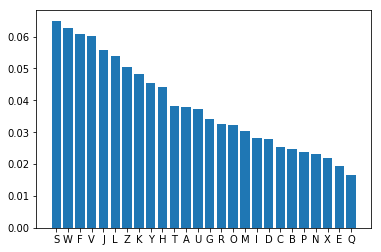

In [28]:
# Let's try a key length equal to 1
t = 1

AS = AlphabeticStrings()
p = ct[0::t]

plot_frequencies(p.frequency_distribution().function())

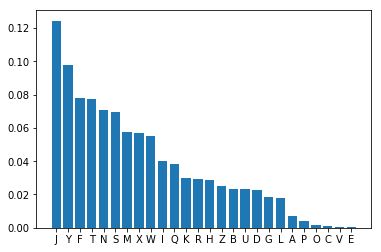

In [29]:
# Let's try a key length equal to 5
t = 5

p = ct[0::5]

plot_frequencies(p.frequency_distribution().function())

In [30]:
# The key size is probably 5
# and the first letter of the key is
A.index("J")-A.index("E")

5

In [31]:
# repeating for all the letters we find the key "FHRSO"
VC = VigenereCryptosystem(AS,5)
VC.deciphering(AS.encoding("FHRSO"),VC.encoding(ct))

TypeError: Argument S (= %s) must be a string.

In [ ]:
# compare to the original plaintext
m = """
THE BLACK CAT

                             by Edgar Allan Poe
                                   (1843)

   FOR the most wild, yet most homely narrative which I am about to pen, I
neither expect nor solicit belief. Mad indeed would I be to expect it, in a
case where my very senses reject their own evidence. Yet, mad am I not --and
very surely do I not dream. But to-morrow I die, and to-day I would
unburthen my soul. My immediate purpose is to place before the world,
plainly, succinctly, and without comment, a series of mere household events.
In their consequences, these events have terrified --have tortured --have
destroyed me. Yet I will not attempt to expound them. To me, they have
presented little but Horror --to many they will seem less terrible than
baroques. Hereafter, perhaps, some intellect may be found which will reduce
my phantasm to the common-place --some intellect more calm, more logical,
and far less excitable than my own, which will perceive, in the
circumstances I detail with awe, nothing more than an ordinary succession of
very natural causes and effects.
   From my infancy I was noted for the docility and humanity of my
disposition. My tenderness of heart was even so conspicuous as to make me
the jest of my companions. I was especially fond of animals, and was
indulged by my parents with a great variety of pets. With these I spent most
of my time, and never was so happy as when feeding and caressing them. This
peculiar of character grew with my growth, and in my manhood, I derived from
it one of my principal sources of pleasure. To those who have cherished an
affection for a faithful and sagacious dog, I need hardly be at the trouble
of explaining the nature or the intensity of the gratification thus
derivable. There is something in the unselfish and self-sacrificing love of
a brute, which goes directly to the heart of him who has had frequent
occasion to test the paltry friendship and gossamer fidelity of mere Man.
   I married early, and was happy to find in my wife a disposition not
uncongenial with my own. Observing my partiality for domestic pets, she lost
no opportunity of procuring those of the most agreeable kind. We had birds,
gold fish, a fine dog, rabbits, a small monkey, and a cat.
   This latter was a remarkably large and beautiful animal, entirely black,
and sagacious to an astonishing degree. In speaking of his intelligence, my
wife, who at heart was not a little tinctured with superstition, made
frequent allusion to the ancient popular notion, which regarded all black
cats as witches in disguise. Not that she was ever serious upon this point
--and I mention the matter at all for no better reason than that it happens,
just now, to be remembered.
   Pluto --this was the cat's name --was my favorite pet and playmate. I
alone fed him, and he attended me wherever I went about the house. It was
even with difficulty that I could prevent him from following me through the
streets.
   Our friendship lasted, in this manner, for several years, during which my
general temperament and character --through the instrumentality of the Fiend
Intemperance --had (I blush to confess it) experienced a radical alteration
for the worse. I grew, day by day, more moody, more irritable, more
regardless of the feelings of others. I suffered myself to use intemperate
language to my At length, I even offered her personal violence. My pets, of
course, were made to feel the change in my disposition. I not only
neglected, but ill-used them. For Pluto, however, I still retained
sufficient regard to restrain me from maltreating him, as I made no scruple
of maltreating the rabbits, the monkey, or even the dog, when by accident,
or through affection, they came in my way. But my disease grew upon me --for
what disease is like Alcohol! --and at length even Pluto, who was now
becoming old, and consequently somewhat peevish --even Pluto began to
experience the effects of my ill temper.
   One night, returning home, much intoxicated, from one of my haunts about
town, I fancied that the cat avoided my presence. I seized him; when, in his
fright at my violence, he inflicted a slight wound upon my hand with his
teeth. The fury of a demon instantly possessed me. I knew myself no longer.
My original soul seemed, at once, to take its flight from my body; and a
more than fiendish malevolence, gin-nurtured, thrilled every fibre of my
frame. I took from my waistcoat-pocket a pen-knife, opened it, grasped the
poor beast by the throat, and deliberately cut one of its eyes from the
socket! I blush, I burn, I shudder, while I pen the damnable atrocity.
   When reason returned with the morning --when I had slept off the fumes of
the night's debauch --I experienced a sentiment half of horror, half of
remorse, for the crime of which I had been guilty; but it was, at best, a
feeble and equivocal feeling, and the soul remained untouched. I again
plunged into excess, and soon drowned in wine all memory of the deed.
   In the meantime the cat slowly recovered. The socket of the lost eye
presented, it is true, a frightful appearance, but he no longer appeared to
suffer any pain. He went about the house as usual, but, as might be
expected, fled in extreme terror at my approach. I had so much of my old
heart left, as to be at first grieved by this evident dislike on the part of
a creature which had once so loved me. But this feeling soon gave place to
irritation. And then came, as if to my final and irrevocable overthrow, the
spirit of PERVERSENESS. Of this spirit philosophy takes no account. Yet I am
not more sure that my soul lives, than I am that perverseness is one of the
primitive impulses of the human heart --one of the indivisible primary
faculties, or sentiments, which give direction to the character of Man. Who
has not, a hundred times, found himself committing a vile or a silly action,
for no other reason than because he knows he should not? Have we not a
perpetual inclination, in the teeth of our best judgment, to violate that
which is Law, merely because we understand it to be such? This spirit of
perverseness, I say, came to my final overthrow. It was this unfathomable
longing of the soul to vex itself --to offer violence to its own nature --to
do wrong for the wrong's sake only --that urged me to continue and finally
to consummate the injury I had inflicted upon the unoffending brute. One
morning, in cool blood, I slipped a noose about its neck and hung it to the
limb of a tree; --hung it with the tears streaming from my eyes, and with
the bitterest remorse at my heart; --hung it because I knew that it had
loved me, and because I felt it had given me no reason of offence; --hung it
because I knew that in so doing I was committing a sin --a deadly sin that
would so jeopardize my immortal soul as to place it --if such a thing were
possible --even beyond the reach of the infinite mercy of the Most Merciful
and Most Terrible God.
   On the night of the day on which this cruel deed was done, I was aroused
from sleep by the cry of fire. The curtains of my bed were in flames. The
whole house was blazing. It was with great difficulty that my wife, a
servant, and myself, made our escape from the conflagration. The destruction
was complete. My entire worldly wealth was swallowed up, and I resigned
myself thenceforward to despair.
   I am above the weakness of seeking to establish a sequence of cause and
effect, between the disaster and the atrocity. But I am detailing a chain of
facts --and wish not to leave even a possible link imperfect. On the day
succeeding the fire, I visited the ruins. The walls, with one exception, had
fallen in. This exception was found in a compartment wall, not very thick,
which stood about the middle of the house, and against which had rested the
head of my bed. The plastering had here, in great measure, resisted the
action of the fire --a fact which I attributed to its having been recently
spread. About this wall a dense crowd were collected, and many persons
seemed to be examining a particular portion of it with every minute and
eager attention. The words "strange!" "singular!" and other similar
expressions, excited my curiosity. I approached and saw, as if graven in bas
relief upon the white surface, the figure of a gigantic cat. The impression
was given with an accuracy truly marvellous. There was a rope about the
animal's neck.
   When I first beheld this apparition --for I could scarcely regard it as
less --my wonder and my terror were extreme. But at length reflection came
to my aid. The cat, I remembered, had been hung in a garden adjacent to the
house. Upon the alarm of fire, this garden had been immediately filled by
the crowd --by some one of whom the animal must have been cut from the tree
and thrown, through an open window, into my chamber. This had probably been
done with the view of arousing me from sleep. The falling of other walls had
compressed the victim of my cruelty into the substance of the freshly-spread
plaster; the lime of which, had then with the flames, and the ammonia from
the carcass, accomplished the portraiture as I saw it.
   Although I thus readily accounted to my reason, if not altogether to my
conscience, for the startling fact 'just detailed, it did not the less fall
to make a deep impression upon my fancy. For months I could not rid myself
of the phantasm of the cat; and, during this period, there came back into my
spirit a half-sentiment that seemed, but was not, remorse. I went so far as
to regret the loss of the animal, and to look about me, among the vile
haunts which I now habitually frequented, for another pet of the same
species, and of somewhat similar appearance, with which to supply its place.

   One night as I sat, half stupefied, in a den of more than infamy, my
attention was suddenly drawn to some black object, reposing upon the head of
one of the immense hogsheads of Gin, or of Rum, which constituted the chief
furniture of the apartment. I had been looking steadily at the top of this
hogshead for some minutes, and what now caused me surprise was the fact that
I had not sooner perceived the object thereupon. I approached it, and
touched it with my hand. It was a black cat --a very large one --fully as
large as Pluto, and closely resembling him in every respect but one. Pluto
had not a white hair upon any portion of his body; but this cat had a large,
although indefinite splotch of white, covering nearly the whole region of
the breast.
   Upon my touching him, he immediately arose, purred loudly, rubbed against
my hand, and appeared delighted with my notice. This, then, was the very
creature of which I was in search. I at once offered to purchase it of the
landlord; but this person made no claim to it --knew nothing of it --had
never seen it before.
   I continued my caresses, and, when I prepared to go home, the animal
evinced a disposition to accompany me. I permitted it to do so; occasionally
stooping and patting it as I proceeded. When it reached the house it
domesticated itself at once, and became immediately a great favorite with my
wife.
   For my own part, I soon found a dislike to it arising within me. This was
just the reverse of what I had anticipated; but I know not how or why it was
--its evident fondness for myself rather disgusted and annoyed. By slow
degrees, these feelings of disgust and annoyance rose into the bitterness of
hatred. I avoided the creature; a certain sense of shame, and the
remembrance of my former deed of cruelty, preventing me from physically
abusing it. I did not, for some weeks, strike, or otherwise violently ill
use it; but gradually --very gradually --I came to look upon it with
unutterable loathing, and to flee silently from its odious presence, as from
the breath of a pestilence.
   What added, no doubt, to my hatred of the beast, was the discovery, on
the morning after I brought it home, that, like Pluto, it also had been
deprived of one of its eyes. This circumstance, however, only endeared it to
my wife, who, as I have already said, possessed, in a high degree, that
humanity of feeling which had once been my distinguishing trait, and the
source of many of my simplest and purest pleasures.
   With my aversion to this cat, however, its partiality for myself seemed
to increase. It followed my footsteps with a pertinacity which it would be
difficult to make the reader comprehend. Whenever I sat, it would crouch
beneath my chair, or spring upon my knees, covering me with its loathsome
caresses. If I arose to walk it would get between my feet and thus nearly
throw me down, or, fastening its long and sharp claws in my dress, clamber,
in this manner, to my breast. At such times, although I longed to destroy it
with a blow, I was yet withheld from so doing, partly it at by a memory of
my former crime, but chiefly --let me confess it at once --by absolute dread
of the beast.
   This dread was not exactly a dread of physical evil-and yet I should be
at a loss how otherwise to define it. I am almost ashamed to own --yes, even
in this felon's cell, I am almost ashamed to own --that the terror and
horror with which the animal inspired me, had been heightened by one of the
merest chimaeras it would be possible to conceive. My wife had called my
attention, more than once, to the character of the mark of white hair, of
which I have spoken, and which constituted the sole visible difference
between the strange beast and the one I had y si destroyed. The reader will
remember that this mark, although large, had been originally very
indefinite; but, by slow degrees --degrees nearly imperceptible, and which
for a long time my Reason struggled to reject as fanciful --it had, at
length, assumed a rigorous distinctness of outline. It was now the
representation of an object that I shudder to name --and for this, above
all, I loathed, and dreaded, and would have rid myself of the monster had I
dared --it was now, I say, the image of a hideous --of a ghastly thing --of
the GALLOWS! --oh, mournful and terrible engine of Horror and of Crime --of
Agony and of Death!
   And now was I indeed wretched beyond the wretchedness of mere Humanity.
And a brute beast --whose fellow I had contemptuously destroyed --a brute
beast to work out for me --for me a man, fashioned in the image of the High
God --so much of insufferable wo! Alas! neither by day nor by night knew I
the blessing of Rest any more! During the former the creature left me no
moment alone; and, in the latter, I started, hourly, from dreams of
unutterable fear, to find the hot breath of the thing upon my face, and its
vast weight --an incarnate Night-Mare that I had no power to shake off
--incumbent eternally upon my heart!
   Beneath the pressure of torments such as these, the feeble remnant of the
good within me succumbed. Evil thoughts became my sole intimates --the
darkest and most evil of thoughts. The moodiness of my usual temper
increased to hatred of all things and of all mankind; while, from the
sudden, frequent, and ungovernable outbursts of a fury to which I now
blindly abandoned myself, my uncomplaining wife, alas! was the most usual
and the most patient of sufferers.
   One day she accompanied me, upon some household errand, into the cellar
of the old building which our poverty compelled us to inhabit. The cat
followed me down the steep stairs, and, nearly throwing me headlong,
exasperated me to madness. Uplifting an axe, and forgetting, in my wrath,
the childish dread which had hitherto stayed my hand, I aimed a blow at the
animal which, of course, would have proved instantly fatal had it descended
as I wished. But this blow was arrested by the hand of my wife. Goaded, by
the interference, into a rage more than demoniacal, I withdrew my arm from
her grasp and buried the axe in her brain. She fell dead upon the spot,
without a groan.
   This hideous murder accomplished, I set myself forthwith, and with entire
deliberation, to the task of concealing the body. I knew that I could not
remove it from the house, either by day or by night, without the risk of
being observed by the neighbors. Many projects entered my mind. At one
period I thought of cutting the corpse into minute fragments, and destroying
them by fire. At another, I resolved to dig a grave for it in the floor of
the cellar. Again, I deliberated about casting it in the well in the yard
--about packing it in a box, as if merchandize, with the usual arrangements,
and so getting a porter to take it from the house. Finally I hit upon what I
considered a far better expedient than either of these. I determined to wall
it up in the cellar --as the monks of the middle ages are recorded to have
walled up their victims.
   For a purpose such as this the cellar was well adapted. Its walls were
loosely constructed, and had lately been plastered throughout with a rough
plaster, which the dampness of the atmosphere had prevented from hardening.
Moreover, in one of the walls was a projection, caused by a false chimney,
or fireplace, that had been filled up, and made to resemble the rest of the
cellar. I made no doubt that I could readily displace the at this point,
insert the corpse, and wall the whole up as before, so that no eye could
detect anything suspicious.
   And in this calculation I was not deceived. By means of a crow-bar I
easily dislodged the bricks, and, having carefully deposited the body
against the inner wall, I propped it in that position, while, with little
trouble, I re-laid the whole structure as it originally stood. Having
procured mortar, sand, and hair, with every possible precaution, I prepared
a plaster could not every poss be distinguished from the old, and with this
I very carefully went over the new brick-work. When I had finished, I felt
satisfied that all was right. The wall did not present the slightest
appearance of having been disturbed. The rubbish on the floor was picked up
with the minutest care. I looked around triumphantly, and said to myself
--"Here at least, then, my labor has not been in vain."
   My next step was to look for the beast which had been the cause of so
much wretchedness; for I had, at length, firmly resolved to put it to death.
Had I been able to meet with it, at the moment, there could have been no
doubt of its fate; but it appeared that the crafty animal had been alarmed
at the violence of my previous anger, and forebore to present itself in my
present mood. It is impossible to describe, or to imagine, the deep, the
blissful sense of relief which the absence of the detested creature
occasioned in my bosom. It did not make its appearance during the night
--and thus for one night at least, since its introduction into the house, I
soundly and tranquilly slept; aye, slept even with the burden of murder upon
my soul!
   The second and the third day passed, and still my tormentor came not.
Once again I breathed as a free-man. The monster, in terror, had fled the
premises forever! I should behold it no more! My happiness was supreme! The
guilt of my dark deed disturbed me but little. Some few inquiries had been
made, but these had been readily answered. Even a search had been instituted
--but of course nothing was to be discovered. I looked upon my future
felicity as secured.
   Upon the fourth day of the assassination, a party of the police came,
very unexpectedly, into the house, and proceeded again to make rigorous
investigation of the premises. Secure, however, in the inscrutability of my
place of concealment, I felt no embarrassment whatever. The officers bade me
accompany them in their search. They left no nook or corner unexplored. At
length, for the third or fourth time, they descended into the cellar. I
quivered not in a muscle. My heart beat calmly as that of one who slumbers
in innocence. I walked the cellar from end to end. I folded my arms upon my
bosom, and roamed easily to and fro. The police were thoroughly satisfied
and prepared to depart. The glee at my heart was too strong to be
restrained. I burned to say if but one word, by way of triumph, and to
render doubly sure their assurance of my guiltlessness.
   "Gentlemen," I said at last, as the party ascended the steps, "I delight
to have allayed your suspicions. I wish you all health, and a little more
courtesy. By the bye, gentlemen, this --this is a very well constructed
house." (In the rabid desire to say something easily, I scarcely knew what I
uttered at all.) --"I may say an excellently well constructed house. These
walls --are you going, gentlemen? --these walls are solidly put together";
and here, through the mere phrenzy of bravado, I rapped heavily, with a cane
which I held in my hand, upon that very portion of the brick-work behind
which stood the corpse of the wife of my bosom.
   But may God shield and deliver me from the fangs of the Arch-Fiend! No
sooner had the reverberation of my blows sunk into silence than I was
answered by a voice from within the tomb! --by a cry, at first muffled and
broken, like the sobbing of a child, and then quickly swelling into one
long, loud, and continuous scream, utterly anomalous and inhuman --a howl
--a wailing shriek, half of horror and half of triumph, such as might have
arisen only out of hell, conjointly from the throats of the damned in their
agony and of the demons that exult in the damnation.
   Of my own thoughts it is folly to speak. Swooning, I staggered to the
opposite wall. For one instant the party upon the stairs remained
motionless, through extremity of terror and of awe. In the next, a dozen
stout arms were tolling at the wall. It fell bodily. The corpse, already
greatly decayed and clotted with gore, stood erect before the eyes of the
spectators. Upon its head, with red extended mouth and solitary eye of fire,
sat the hideous beast whose craft had seduced me into murder, and whose
informing voice had consigned me to the hangman. I had walled the monster up
within the tomb!
"""

# Homework

The ciphertext "KDDKMU" has been encrypted with a Ceasar cipher. Find the plaintext using brute force attack.

Encrypt the plaintext "CLEOPATRA" using an affine cipher with encryption function 7x+8.

The ciphertext "MZDVEZC" has been obtained using an affine cipher with encryption function y=5x+12. Find the plaintext.